<a href="https://colab.research.google.com/github/Ximenaloranca/Investigaci-n-de-operaciones/blob/main/Metodo_de_minimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metodo de minimos cuadrados**

In [111]:
# Agregamos las librerias que se van a utilizar
import sympy as sp
import matplotlib.pyplot as plt # é librerias para graficas, pues para ver como lacompracion de las soluciones
import numpy as np

In [112]:
# Primero defnimos las variables simbolicas
x = sp.symbols('x')
a, b = sp.symbols('a b')

In [113]:
# Usamos las condiciones
u_n = 2*x + a*x**2 + b*x**3

print("Funcion prueba") # No se por que se ven tan feas las ecuaciones
sp.pprint(u_n)

Funcion prueba
   2      3      
a⋅x  + b⋅x  + 2⋅x


In [114]:
# En este paso calculamos las derivadas
u_n_2 = sp.diff(u_n, x, 2)  # Segunda derivada

In [115]:
# Definimos el error
E = u_n_2 + u_n - x

Usamos el metodo ya aplicado de minimos cuadrados para resolver el problema

In [116]:
# Integramos el cuadrado del error
J = sp.integrate(E**2, (x, 0, 1))

In [117]:
# Minimizamos las derivadas parciales
eq1 = sp.diff(J, a)
eq2 = sp.diff(J, b)

# Resolvemos el sistema para encontrar los coeficientes optimos
sol = sp.solve([eq1, eq2], (a, b))

print("\nCoeficientes (a, b)")
print(sol)


Coeficientes (a, b)
{a: -1335/86789, b: -24759/173578}


In [118]:
# Para la solucion final
u_aproximada = u_n.subs(sol)

print("Solucion aproximada")
sp.pprint(u_aproximada)

# Definimos la solucion exacta para comparar
u_exacta = sp.sin(x) + x

Solucion aproximada
         3         2      
  24759⋅x    1335⋅x       
- ──────── - ─────── + 2⋅x
   173578     86789       


Gráfica generada en una ventana emergente.


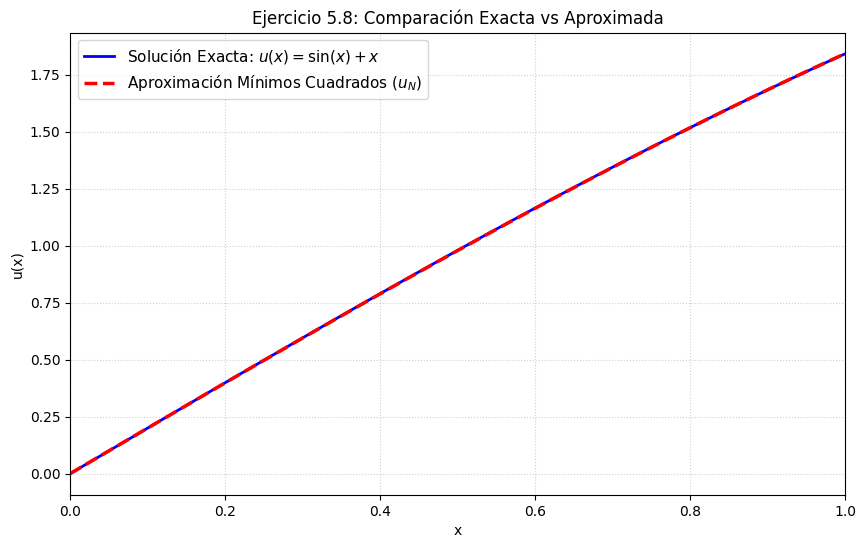

In [119]:
# Grafica
f_exacta_num = sp.lambdify(x, u_exacta, modules='numpy') # Convertimos las expresiones simbolicas a funciones numericas para poder graficar
f_aprox_num = sp.lambdify(x, u_aproximada, modules='numpy')

# 2. Crear el dominio numérico para X
# Generamos 100 puntos entre 0 y 1
x_numerico = np.linspace(0, 1, 100)

# 3. Calcular los valores de Y para esos puntos
y_exacta = f_exacta_num(x_numerico)
y_aprox = f_aprox_num(x_numerico)

# 4. Crear la gráfica con Matplotlib
plt.figure(figsize=(10, 6)) # Tamaño de la figura

# Graficar la solución exacta (Línea azul sólida)
# NOTA LA 'r' ANTES DE LAS COMILLAS EN label=r'...'
plt.plot(x_numerico, y_exacta, 'b-', linewidth=2, label=r'Solución Exacta: $u(x) = \sin(x) + x$')

# Graficar la aproximación (Línea roja punteada)
# También agregamos la 'r' aquí por si acaso (aunque u_N no tenga barras invertidas ahora, es buena práctica)
plt.plot(x_numerico, y_aprox, 'r--', linewidth=2.5, label=r'Aproximación Mínimos Cuadrados ($u_N$)')

# Añadir detalles a la gráfica
plt.title('Ejercicio 5.8: Comparación Exacta vs Aproximada')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend(fontsize=11) # Mostrar la leyenda
plt.grid(True, linestyle=':', alpha=0.6) # Añadir una cuadrícula suave
plt.xlim([0, 1]) # Asegurar que el eje X va de 0 a 1

# Mostrar la gráfica
print("Gráfica generada en una ventana emergente.")
plt.show()